In [ ]:
#DATA IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
#data load
df = pd.read_csv('kpp_train3.csv', encoding='utf-8')
df.head()

,datetime,count
0,2016-01-01,1863
1,2016-01-02,982
2,2016-01-03,6
3,2016-01-04,2464
4,2016-01-05,3053


In [ ]:
#data preprocessing
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df.head()

,count
datetime,
2016-01-01,1863
2016-01-02,982
2016-01-03,6
2016-01-04,2464
2016-01-05,3053


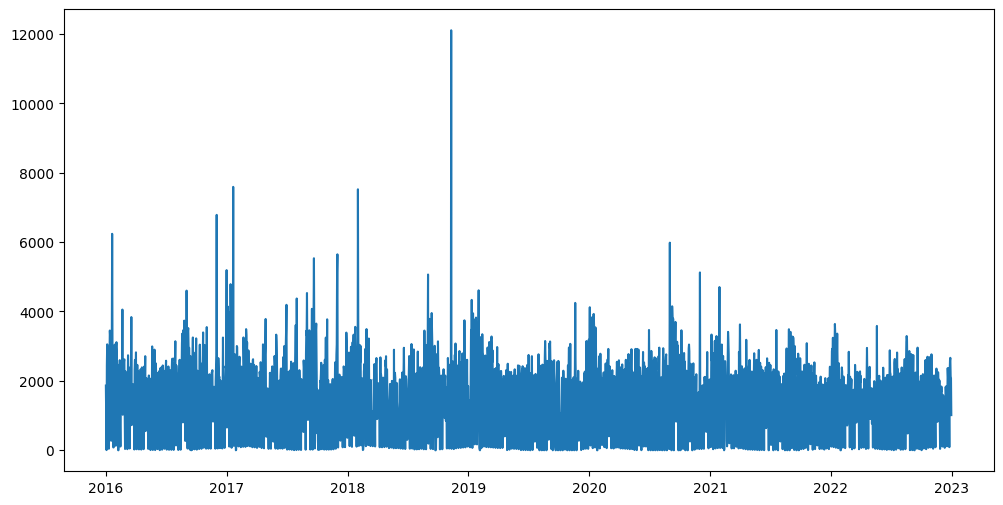

In [ ]:
#data visualization
plt.figure(figsize=(12, 6))
plt.plot(df['count'])
plt.show()

In [ ]:
#datetime 칼럼의 데이터형식을 datetime으로 변환한다.
#train['datetime'] = pd.to_datetime(train['datetime'])
#test['datetime'] = pd.to_datetime(test['datetime'])

In [ ]:
#data split
train = df[:'2021-12-31']
test = df['2022-01-01':]
train.shape, test.shape
train, test

(            count
 datetime         
 2016-01-01   1863
 2016-01-02    982
 2016-01-03      6
 2016-01-04   2464
 2016-01-05   3053
 ...           ...
 2021-12-27   1397
 2021-12-28   2012
 2021-12-29   2408
 2021-12-30   1344
 2021-12-31   2393
 
 [2192 rows x 1 columns],
             count
 datetime         
 2022-01-01   1019
 2022-01-02    105
 2022-01-03   2125
 2022-01-04   2860
 2022-01-05   2925
 ...           ...
 2022-12-27   2591
 2022-12-28   2664
 2022-12-29   2128
 2022-12-30   2079
 2022-12-31   1014
 
 [365 rows x 1 columns])

In [ ]:
#data scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [ ]:
#data split
def split_xy(dataset, time_steps, y_column):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column
        if y_end_number > len(dataset):
            break
        tmp_x = dataset[i:x_end_number, :]
        tmp_y = dataset[x_end_number:y_end_number, 0]
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

#data split
time_steps = 7
y_column = 1
train_feature, train_label = split_xy(train_scaled, time_steps, y_column)
test_feature, test_label = split_xy(test_scaled, time_steps, y_column)
train_feature.shape, train_label.shape, test_feature.shape, test_label.shape

((2185, 7, 1), (2185, 1), (358, 7, 1), (358, 1))

In [ ]:
#modeling
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(train_feature.shape[1], train_feature.shape[2])))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model training
history = model.fit(train_feature, train_label, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
62/62 [==============================] - 4s 15ms/step - loss: 0.0102 - mae: 0.0773 - val_loss: 0.0050 - val_mae: 0.0554
Epoch 2/100
62/62 [==============================] - 0s 6ms/step - loss: 0.0075 - mae: 0.0660 - val_loss: 0.0050 - val_mae: 0.0540
Epoch 3/100
62/62 [==============================] - 0s 7ms/step - loss: 0.0073 - mae: 0.0648 - val_loss: 0.0049 - val_mae: 0.0550
Epoch 4/100
62/62 [==============================] - 0s 6ms/step - loss: 0.0072 - mae: 0.0642 - val_loss: 0.0048 - val_mae: 0.0526
Epoch 5/100
62/62 [==============================] - 0s 7ms/step - loss: 0.0069 - mae: 0.0629 - val_loss: 0.0044 - val_mae: 0.0494
Epoch 6/100
62/62 [==============================] - 1s 9ms/step - loss: 0.0065 - mae: 0.0602 - val_loss: 0.0037 - val_mae: 0.0463
Epoch 7/100
62/62 [==============================] - 1s 9ms/step - loss: 0.0059 - mae: 0.0568 - val_loss: 0.0032 - val_mae: 0.0430
Epoch 8/100
62/62 [==============================] - 1s 10ms/step - loss: 0.0055 -

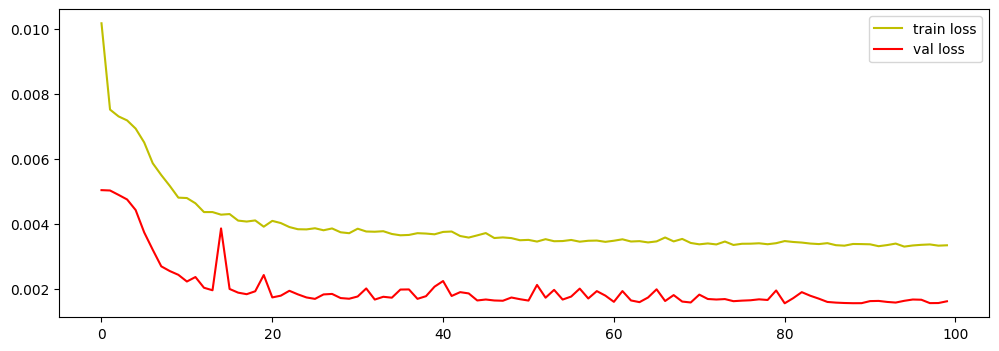

In [ ]:
#model evaluation
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], 'y', label='train loss')
plt.plot(history.history['val_loss'], 'r', label='val loss')
plt.legend()
plt.show()

12/12 [==============================] - 1s 3ms/step


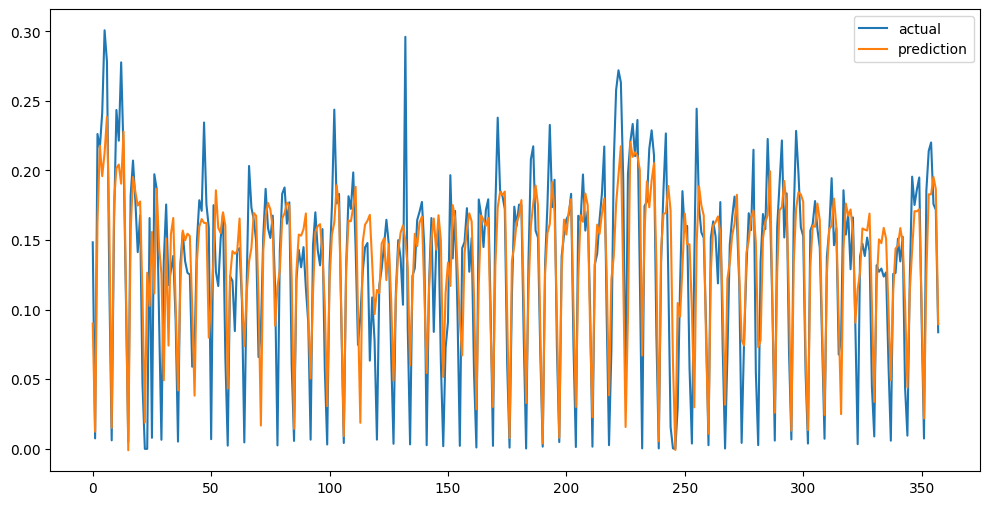

In [ ]:
#model prediction visualization
pred = model.predict(test_feature)
plt.figure(figsize=(12, 6))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
#model evaluation
rmse = np.sqrt(mean_squared_error(test_label, pred))
print('RMSE :', rmse)

RMSE : 0.041884975002335754


In [ ]:
##########################################################################################################################################

In [ ]:
pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 5.4 MB/s eta 0:00:00


In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#modeling
from prophet import Prophet
df = pd.read_csv('kpp_train3.csv', encoding='utf-8')
df.head()

,datetime,count
0,2016-01-01,1863
1,2016-01-02,982
2,2016-01-03,6
3,2016-01-04,2464
4,2016-01-05,3053


In [ ]:
#data preprocessing
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df.head()

,count
datetime,
2016-01-01,1863
2016-01-02,982
2016-01-03,6
2016-01-04,2464
2016-01-05,3053


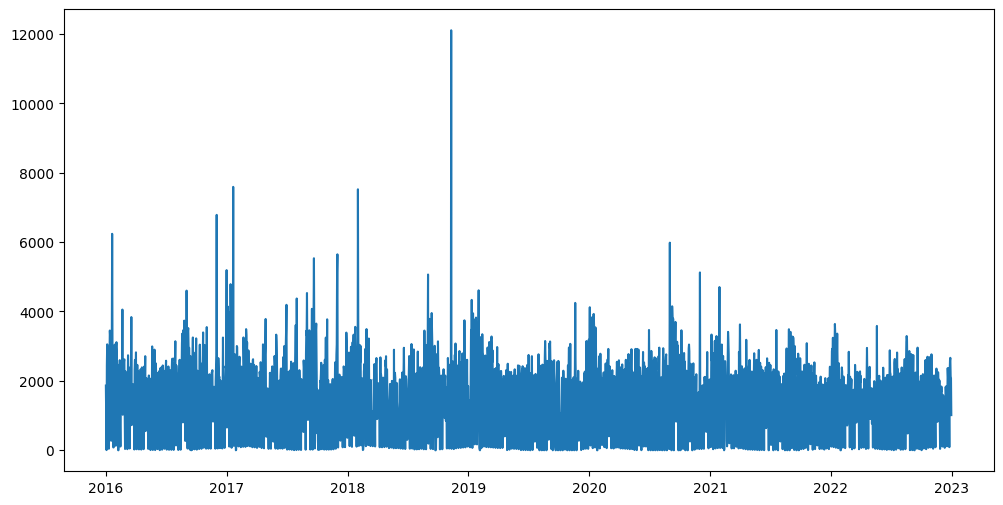

In [ ]:
#data visualization
plt.figure(figsize=(12, 6))
plt.plot(df['count'])
plt.show()

In [ ]:
#data split
train = df[:'2021-12-31']
test = df['2022-01-01':]
train.shape, test.shape

((2192, 1), (365, 1))

In [ ]:
#data preprocessing
train = train.reset_index()
train.columns = ['ds', 'y']
train.head()

,ds,y
0,2016-01-01,1863
1,2016-01-02,982
2,2016-01-03,6
3,2016-01-04,2464
4,2016-01-05,3053


In [ ]:
#data preprocessing
test = test.reset_index()
test.columns = ['ds2', 'y2']
test.head()

,ds2,y2
0,2022-01-01,1019
1,2022-01-02,105
2,2022-01-03,2125
3,2022-01-04,2860
4,2022-01-05,2925


In [ ]:
#modeling
model = Prophet()
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfba8mzn0/q4if8ezy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfba8mzn0/1cj0gu4v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84039', 'data', 'file=/tmp/tmpfba8mzn0/q4if8ezy.json', 'init=/tmp/tmpfba8mzn0/1cj0gu4v.json', 'output', 'file=/tmp/tmpfba8mzn0/prophet_modellb71w5oy/prophet_model-20230410070104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:01:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:01:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#model prediction
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,1731.876632,1625.571612,3267.690854,1731.876632,1731.876632,739.665860,739.665860,739.665860,591.443882,591.443882,591.443882,148.221979,148.221979,148.221979,0.0,0.0,0.0,2471.542492
1,2016-01-02,1732.396060,638.385112,2167.012097,1732.396060,1732.396060,-310.088896,-310.088896,-310.088896,-512.938982,-512.938982,-512.938982,202.850086,202.850086,202.850086,0.0,0.0,0.0,1422.307164
2,2016-01-03,1732.915489,-500.124547,1135.454879,1732.915489,1732.915489,-1428.156994,-1428.156994,-1428.156994,-1687.530922,-1687.530922,-1687.530922,259.373928,259.373928,259.373928,0.0,0.0,0.0,304.758494
3,2016-01-04,1733.434917,1416.512086,3074.582603,1733.434917,1733.434917,513.017247,513.017247,513.017247,195.967683,195.967683,195.967683,317.049563,317.049563,317.049563,0.0,0.0,0.0,2246.452164
4,2016-01-05,1733.954346,1756.851373,3435.787786,1733.954346,1733.954346,912.013833,912.013833,912.013833,536.934902,536.934902,536.934902,375.078931,375.078931,375.078931,0.0,0.0,0.0,2645.968178


<Figure size 1200x600 with 0 Axes>

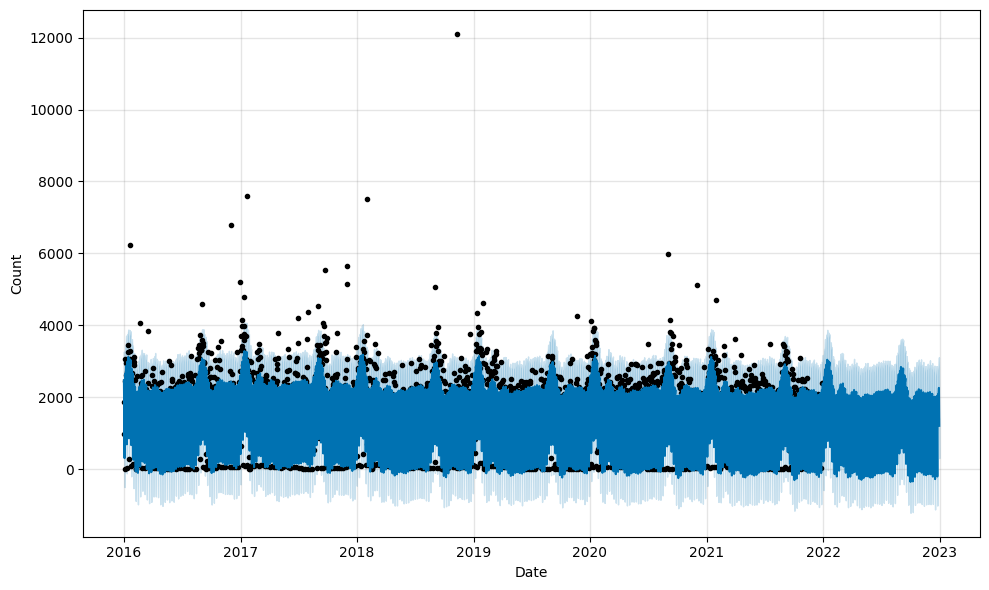

In [ ]:
#model evaluation
plt.figure(figsize=(12, 6))
model.plot(forecast, xlabel='Date', ylabel='Count')
plt.show()

<Figure size 1200x600 with 0 Axes>

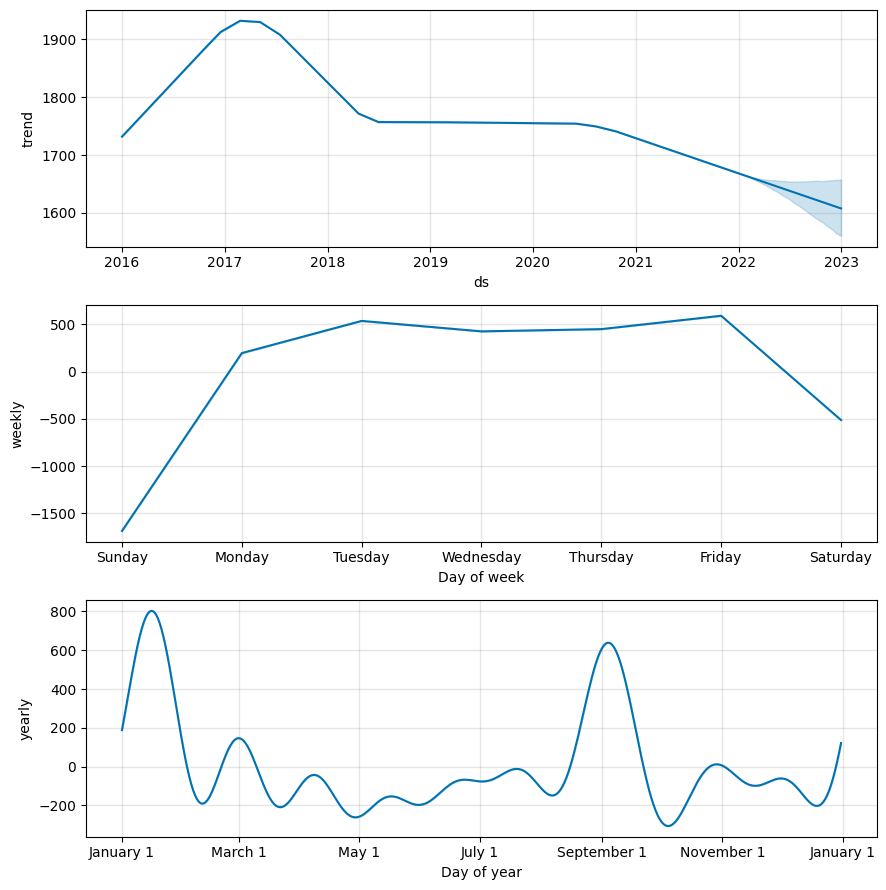

In [ ]:
#model evaluation
plt.figure(figsize=(12, 6))
model.plot_components(forecast)
plt.show()

IndexError: ignored

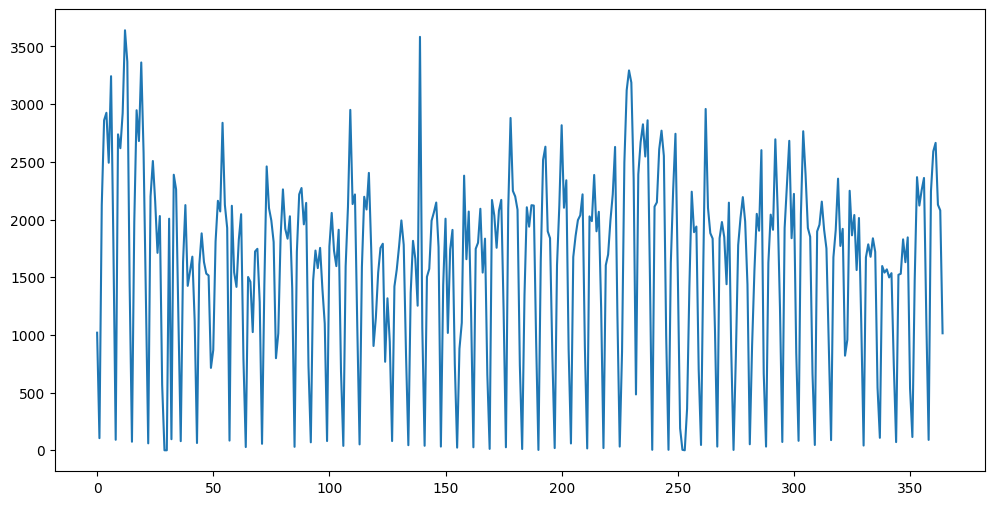

In [ ]:
#model evaluation
plt.figure(figsize=(12, 6))
plt.plot(test['y2'], label='actual')
plt.plot(pred['count'], label='prediction')
plt.legend()
plt.show()

In [ ]:
#model evaluation
rmse = np.sqrt(mean_squared_error(test['y2'], pred['count']))
print('RMSE :', rmse)

IndexError: ignored